<a href="https://colab.research.google.com/github/RautenM/PythonFundamentals/blob/main/Copy_of_Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

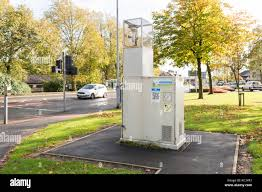



# Air quality 

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

To create this project I nedded skipp a heading line, times which was not in the same format and Nitrogen Dioxide levels which are, again, text and contain nodata




### Project 

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file  


First I have skipped first row, then convert data to date format removed rows with no data  in the Nitrogen dioxide column

In [35]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA",skiprows = 1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB


,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,1:00,35.65193,V µg/m³
1,01/01/2020,2:00,37.99122,V µg/m³
2,01/01/2020,3:00,35.70462,V µg/m³
3,01/01/2020,4:00,36.5796,V µg/m³
4,01/01/2020,5:00,32.9441,V µg/m³


In [33]:

df.dropna()
df['Date']= pd.to_datetime(df['Date'])
df

df = pd.read_csv("https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA",days=['Date'])
df['Date']= pd.to_datetime(df['Date'])

week_df = df.groupby(df['Date'].dt.weekday_name).mean()
print(week_df)



TypeError: ignored

### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [37]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA",skiprows = 1)





df['Date']= pd.to_datetime(df['Date'])

week_df = df.groupby(df["Date"].dt.weekday).mean()
print(week_df)
weekday_name= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_df = df.groupby(df['Date'].dt.weekday_name).mean().reindex(days)
print(week_df)


#week_days = df.groupby(df["Date"].dt.weekday_name)
#print(week_days)


                    Date
Date                    
0    2020-07-02 12:00:00
1    2020-07-03 12:00:00
2    2020-07-01 00:00:00
3    2020-07-02 00:00:00
4    2020-06-29 12:00:00
5    2020-06-30 12:00:00
6    2020-07-01 12:00:00


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


AttributeError: ignored

In [12]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ",skiprows = 1)
df.info()

df['Date']= pd.to_datetime(df['Date'])
df.dropna()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8760 non-null   object
 1   Time              8760 non-null   object
 2   Nitrogen dioxide  8760 non-null   object
 3   Status            8760 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


<bound method NDFrame.describe of            Date   Time Nitrogen dioxide   Status
0    2021-01-01  01:00         16.58269  V µg/m³
1    2021-01-01  02:00         14.00478  V µg/m³
2    2021-01-01  03:00         15.35208  V µg/m³
3    2021-01-01  04:00         13.49688  V µg/m³
4    2021-01-01  05:00         12.47511  V µg/m³
...         ...    ...              ...      ...
8755 2021-12-31  20:00         12.51492  P µg/m³
8756 2021-12-31  21:00         14.00046  P µg/m³
8757 2021-12-31  22:00         10.04780  P µg/m³
8758 2021-12-31  23:00          3.49557  P µg/m³
8759 2021-12-31  24:00          4.15682  P µg/m³

[8760 rows x 4 columns]>

In [15]:
def highest_level():
  df
  df["Highest_level"] = df["Nitrogen dioxide"]
  highest_level = df[df['Nitrogen dioxide'].max].groupby('Highest_level',)['Nitrogen dioxide'].count()
  return highest_level
highest_level()
      







#df[df[column] = df[df["weekday"]= Monday]




### week_days = total for Mon Tue Wed Thur Fri Sat Sun
###  NO2_Level = level in each day 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8760 non-null   object
 1   Time              8760 non-null   object
 2   Nitrogen dioxide  8760 non-null   object
 3   Status            8760 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


TypeError: ignored